In [8]:
!wget https://github.com/itamarcaspi/experimentdatar/raw/master/data/vouchers.rda

--2020-02-11 23:37:00--  https://github.com/itamarcaspi/experimentdatar/raw/master/data/vouchers.rda
github.com (github.com) をDNSに問いあわせています... 52.69.186.44
github.com (github.com)|52.69.186.44|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 302 Found
場所: https://raw.githubusercontent.com/itamarcaspi/experimentdatar/master/data/vouchers.rda [続く]
--2020-02-11 23:37:01--  https://raw.githubusercontent.com/itamarcaspi/experimentdatar/master/data/vouchers.rda
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 151.101.108.133
raw.githubusercontent.com (raw.githubusercontent.com)|151.101.108.133|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 100723 (98K) [application/octet-stream]
`vouchers.rda' に保存中

vouchers.rda        100%[===================>]  98.36K  --.-KB/s 時間 0.008s     

2020-02-11 23:37:01 (11.5 MB/s) - `vouchers.rda' へ保存完了 [100723/100723]



In [25]:
import rdata
vouchers_rda = rdata.parser.parse_file('./vouchers.rda')
vouchers_df = rdata.conversion.convert(vouchers_rda)['vouchers']

/Users/takashinishibayashi/dev/ipython-notebook-bootstrap/env/lib/python3.7/site-packages/rdata/conversion/_conversion.py:495: UserWarning: Missing constructor for R class "tbl_df". The constructor for class "tbl" will be used instead.
  stacklevel=1)
/Users/takashinishibayashi/dev/ipython-notebook-bootstrap/env/lib/python3.7/site-packages/rdata/conversion/_conversion.py:495: UserWarning: Missing constructor for R class "tbl". The constructor for class "data.frame" will be used instead.
  stacklevel=1)


In [28]:
len(vouchers_df)

25330

In [26]:
vouchers_df.head()

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,1.0,NaN,12.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0.0,0.0,0.0,0.0,NaN,13.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1.0,0.0,0.0,0.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.0,1.0,0.0,0.0,1.0,14.0,12.0,0.0,8.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [27]:
vouchers_df.columns

Index(['ID', 'BOG95SMP', 'BOG97SMP', 'JAM93SMP', 'SEX', 'AGE', 'AGE2',
       'HSVISIT', 'SCYFNSH', 'INSCHL', 'PRSCH_C', 'PRSCHA_1', 'PRSCHA_2',
       'VOUCH0', 'BOG95ASD', 'BOG97ASD', 'JAM93ASD', 'DBOGOTA', 'DJAMUNDI',
       'D1995', 'D1997', 'RESPONSE', 'TEST_TAK', 'SEX_NAME', 'SVY', 'D1993',
       'PHONE', 'DAREA1', 'DAREA2', 'DAREA3', 'DAREA4', 'DAREA5', 'DAREA6',
       'DAREA7', 'DAREA8', 'DAREA9', 'DAREA10', 'DAREA11', 'DAREA12',
       'DAREA13', 'DAREA14', 'DAREA15', 'DAREA16', 'DAREA17', 'DAREA18',
       'DAREA19', 'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5',
       'DMONTH6', 'DMONTH7', 'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11',
       'DMONTH12', 'BOG95', 'BOG97', 'MOM_SCH', 'MOM_AGE', 'MOM_MW', 'DAD_SCH',
       'DAD_AGE', 'DAD_MW', 'SEX2', 'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4',
       'STRATA5', 'STRATA6', 'STRATAMS', 'REPT6', 'TOTSCYRS', 'HASCHILD',
       'MARRIED', 'WORKING', 'REPT', 'NREPT', 'FINISH6', 'FINISH7', 'FINISH8',
       'SEX_MISS', 'US

In [31]:
c_treatment = ['VOUCH0']
c_ys = [
    'TOTSCYRS', 'INSCHL', 'PRSCH_C', 'USNGSCH', 'PRSCHA_1',
    'FINISH6', 'FINISH7', 'FINISH8', 'REPT6', 'REPT', 'NREPT',
    'MARRIED', 'HASCHILD', 'HOURSUM', 'WORKING3'
]
c_covariates = [
    'DMONTH1', 'DMONTH2', 'DMONTH3', 'DMONTH4', 'DMONTH5',
    'DMONTH6', 'DMONTH7', 'DMONTH8', 'DMONTH9', 'DMONTH10', 'DMONTH11',
    'DMONTH12', 'SEX2', 'SVY', 'HSVISIT', 'AGE', 'D1993', 'D1995', 'D1997',
    'STRATA1', 'STRATA2', 'STRATA3', 'STRATA4', 'STRATA5', 'STRATA6', 'STRATAMS'
]

In [83]:
import statsmodels.api as sm

def fit(df, y_column, with_covariates):
        y = df[y_column]
        if with_covariates:
            x_cols = c_treatment + c_covariates
        else:
            x_cols = c_treatment
        result = sm.OLS(exog=df[x_cols][y.notna()].fillna(0).assign(intercept=1), endog=y[y.notna()]).fit()
        return result

In [84]:
results = {}
for y_col in c_ys:
    for with_covariate in [True, False]:
        results[(y_col, with_covariate)] = fit(vouchers_df, y_col, with_covariate)

## 2.2.3 私立学校への通学と割引券の利用についての分析

- PRISCHA_1: 6年生の開始時に私立学校に在籍していたか
- USNGSCH: 調査期間中に何かしらの奨学金を使ったか

In [89]:
results[('PRSCHA_1', False)].params

VOUCH0       0.063258
intercept    0.856507
dtype: float64

In [90]:
results[('PRSCHA_1', True)].params

VOUCH0       0.060799
DMONTH1      0.206410
DMONTH2      0.093321
DMONTH3      0.106854
DMONTH4      0.139479
DMONTH5      0.097242
DMONTH6      0.076077
DMONTH7      0.102665
DMONTH8      0.117797
DMONTH9      0.178576
DMONTH10    -0.122592
DMONTH11     0.054107
DMONTH12    -0.062983
SEX2        -0.008625
SVY         -0.017306
HSVISIT     -0.039142
AGE         -0.018787
D1993       -0.201891
D1995       -0.062900
D1997       -0.103960
STRATA1      0.138593
STRATA2      0.145036
STRATA3      0.118454
STRATA4      0.143637
STRATA5      0.229758
STRATA6      0.116545
STRATAMS     0.094929
intercept    0.986953
dtype: float64

In [91]:
results[('USNGSCH', False)].params

VOUCH0       0.541771
intercept    0.063877
dtype: float64

In [92]:
results[('USNGSCH', True)].params

VOUCH0       0.536190
DMONTH1      0.024770
DMONTH2      0.114709
DMONTH3      0.052053
DMONTH4      0.036935
DMONTH5      0.047994
DMONTH6      0.020503
DMONTH7      0.070713
DMONTH8      0.104850
DMONTH9      0.206060
DMONTH10    -0.067310
DMONTH11     0.074279
DMONTH12     0.066406
SEX2        -0.027190
SVY         -0.085128
HSVISIT     -0.050555
AGE         -0.043307
D1993       -0.106938
D1995       -0.222503
D1997       -0.191734
STRATA1      0.119298
STRATA2      0.171270
STRATA3      0.123264
STRATA4      0.123376
STRATA5     -0.192964
STRATA6      0.311966
STRATAMS     0.095752
intercept    0.751962
dtype: float64

## 2.3.4 割引券は留年を減らしているか?

In [131]:
x = []
y = []
y_err = []
for col in ['FINISH6', 'FINISH7', 'FINISH8','INSCHL', 'NREPT', 'PRSCH_C', 'REPT', 'REPT6']:
    x.append(col)
    _y = results[(col, True)].params['VOUCH0']
    # 上側誤差と下側誤差が同じ
    _err = results[(col, True)].conf_int().loc['VOUCH0'].values[1] - _y
    y_err.append(_err)
    y.append(_y)

Text(0.5, 1.0, '留年の傾向')

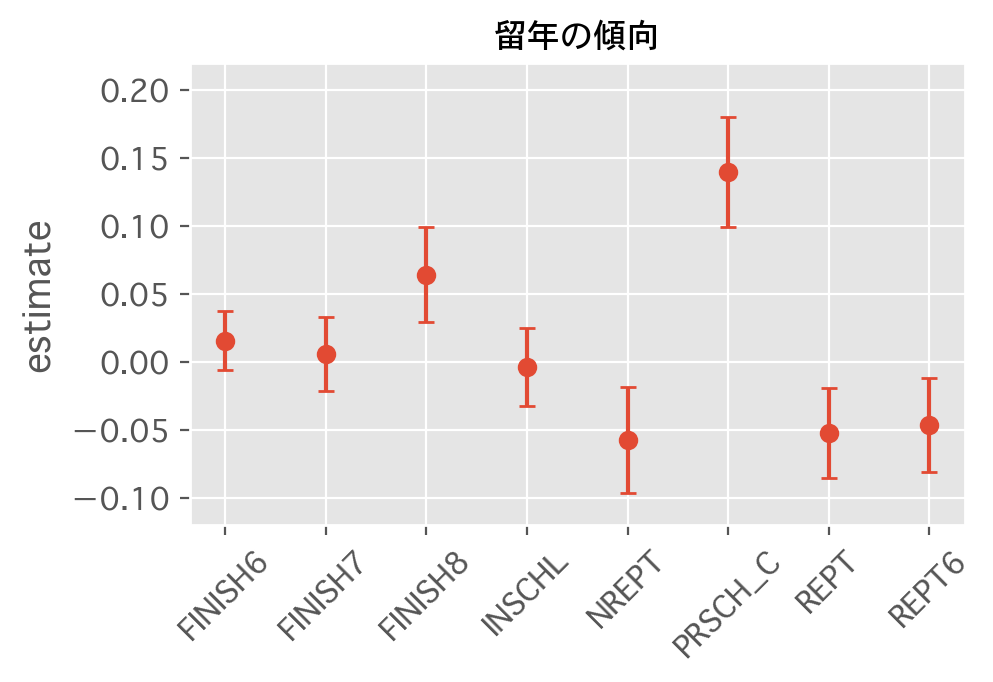

In [139]:
plt.errorbar(x, y, fmt='o', yerr=y_err, capsize=3)
plt.xticks(rotation=45)
plt.ylim(-0.12, 0.22)
plt.ylabel('estimate')
plt.title('留年の傾向')